## Atividade N1 - Inteligência Artificial 2025.1

## Nome: Isabella Soares Couto

## RA: 081210006

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Um engenheiro de computação foi contratado para trabalhar com machine learning em uma empresa de consultoria. Essa empresa em particular tem clientes confidenciais que não podem ter seus dados expostos ou vazados no mercado.
Diante disso, o engenheiro trabalhará somente com a base de dados fornecida sem o conhecimento do tipo de negócio ou área de atuação. Para o desenvolvimento do seu primeiro trabalho na empresa de consultoria, o engenheiro de
computação recebeu a base de dados contida no arquivo **”Base\_N1\_B1\_2025.1.xlsx”**.

### Base de dados :

In [3]:
base = pd.read_excel("Base_N1_B1_2025.1.xlsx")

In [4]:
base.head()

,Feature1,Feature2,Label
0,0.000,5.472986,Red
1,0.005,4.326074,Red
2,0.010,5.257439,Red
3,0.015,3.321764,Red
4,0.020,5.783143,Red


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  800 non-null    float64
 1   Feature2  800 non-null    float64
 2   Label     800 non-null    object 
dtypes: float64(2), object(1)
memory usage: 18.9+ KB


In [6]:
base['Label'].value_counts() / len(base)

Label
Red     0.5
Blue    0.5
Name: count, dtype: float64

In [7]:
stats = base.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Feature1,800.0,1.072500,0.582564,0.000000,0.573750,1.072500,1.571250,2.145000
Feature2,800.0,3.588866,3.133176,-3.353179,0.712466,3.553948,6.438598,9.963324


Diante das informações fornecidas, o engenheiro de computação deve desenvolver as soluções solicitadas pelo cliente descritas a seguir. A primeira solicitação é

**(5,0 pontos) desenvolver um algoritmo classificador, utilizando machine learning, que retorne a classe “Red” ou “Blue” para uma entrada [Feature1, Feature2].**

**Transformação das classes**

In [8]:
features = base.drop(columns=['Label'])
target = base['Label']

# Transforma coluna target de str para int
class_mapper = {'Red': -1, 'Blue': 1}
target = target.map(class_mapper)

In [9]:
features

,Feature1,Feature2
0,0.000,5.472986
1,0.005,4.326074
2,0.010,5.257439
3,0.015,3.321764
4,0.020,5.783143
...,...,...
795,2.125,2.760104
796,2.130,3.526581
797,2.135,3.404561
798,2.140,3.633677


In [10]:
target

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
795    1
796    1
797    1
798    1
799    1
Name: Label, Length: 800, dtype: int64

**Treinamento do modelo**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LinearRegression

In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
model = Perceptron(random_state=50)

In [14]:
model.fit(X_train, y_train)

Perceptron(random_state=50)

In [15]:
y_pred = model.predict(X_test)

In [16]:
# Import para calcular metricas do modelo
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, classification_report

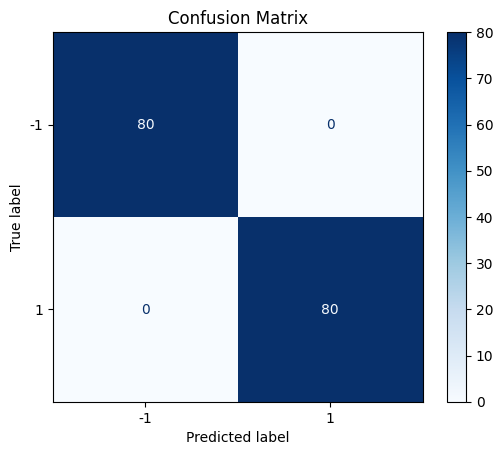

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Classification report
rev_class_mapper = {v: k for k, v in class_mapper.items()}
classes = [rev_class_mapper[i] for i in model.classes_]
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

         Red       1.00      1.00      1.00        80
        Blue       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



O modelo foi capaz de prever corretamente todas as instâncias de ambas as classes, sem nenhum erro. A acurácia geral é de 100%, o que indica que o modelo classificou corretamente todas as 160 instâncias no conjunto de dados.

In [19]:
def plot_decision_boundary(X, y, model, title):
    h = .02  
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    # De vermelho para azul
    cmap = ListedColormap(plt.cm.coolwarm(np.linspace(1, 0, 256)))

    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    # plt.xticks(())
    # plt.yticks(())
    plt.title(title)
    plt.show()

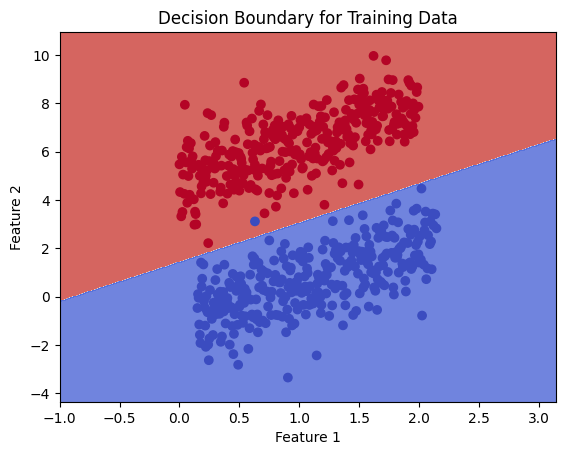

In [20]:
# Decision boundary para os dados de treinamento
plot_decision_boundary(X_train, y_train, model, 'Decision Boundary for Training Data')

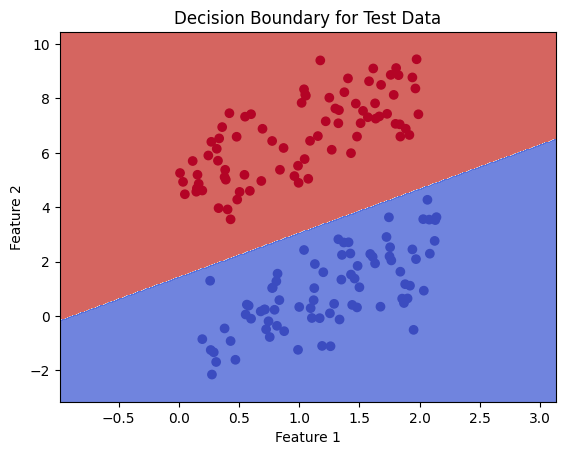

In [21]:
# Decision boundary para os dados de teste
plot_decision_boundary(X_test, y_test, model, 'Decision Boundary for Test Data')

In [22]:
def classify(feature1, feature2):
    return rev_class_mapper[model.predict([[feature1, feature2]])[0]]

Realizando teste com novas previsões para 'Feature1' e 'Feature2'

In [23]:
# Adicionando valores de teste
feature1 = 2.5
feature2 = 4
classify(feature1, feature2)

'Blue'

O resultado está correto pois de acordo com o gráfico 'Decision Boundary for Training Data' o resultado para os valores de Feature1 = 2.5 e Feature2 = 4 é da cor 'Blue'

In [24]:
# Adicionando valores de teste
feature1 = 2.5
feature2 = 6
classify(feature1, feature2)

'Red'

Se o resultado do classificador for viável e adequado, o engenheiro deve

**(3,0 pontos) desenvolver um algoritmo estimador, utilizando machine learning, para o conjunto de dados da classe “Red”.**

In [25]:
def linear_regression(feature1, feature2):
    # Calcula a combinação linear das características (feature1 e feature2) usando os coeficientes do modelo
    linear_combination = model.intercept_ + model.coef_[0][0] * feature1 + model.coef_[0][1] * feature2
    
    # Retorna a classe prevista com base na combinação linear, 
    # assumindo que a classe será 1 se a combinação linear for maior que 0, e 0 caso contrário
    return model.classes_[int(linear_combination > 0)]

In [26]:
# Selecionando conjunto de dados da classe Red
red = base[base['Label'] == 'Red']

In [27]:
linear_regression(2.5, -4)

np.int64(1)

In [28]:
# Prevendo manualmente para os dados da classe Red
result = red.apply(lambda x: linear_regression(x['Feature1'], x['Feature2']), axis=1)

In [29]:
result.value_counts()

-1    400
Name: count, dtype: int64

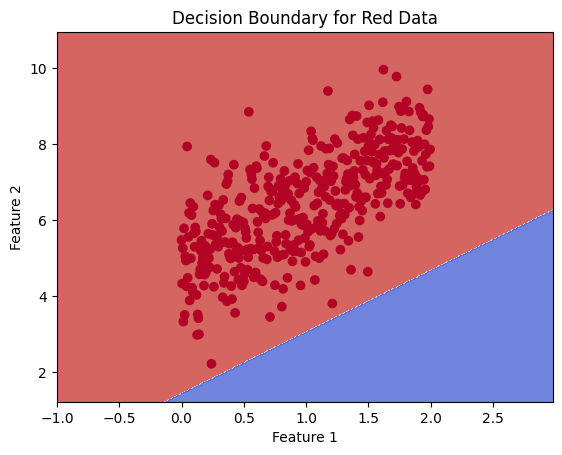

In [30]:
plot_decision_boundary(red[['Feature1', 'Feature2']], result, model, 'Decision Boundary for Red Data')

Para concluir a entrega ao cliente, o engenheiro deve finalizar seu trabalho

**(2,0 pontos) informando o nível de confiabilidade esperado em cada solução desenvolvida. Justifique sua resposta.**

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score

In [32]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=30)

In [33]:
# Cross validation training
scoresp = cross_val_score(Perceptron(random_state=42), features, target, cv=cv)
scoresp

array([1.     , 0.99375, 0.99375, 0.99375, 0.99375])

In [34]:
print(f"Acurácia Média Perceptron: {scoresp.mean():.3f} (+/- {scoresp.std():.3f})")

Acurácia Média Perceptron: 0.995 (+/- 0.002)


In [35]:
# Cria um calculador de score que transfoma Linear Regression float output para formato class e depois calcula a acurácia
def linear_regression_accuracy(y_true, y_pred):
    y_pred_class = np.array([model.classes_[int(i > 0)] for i in y_pred])
    return accuracy_score(y_true, y_pred_class)


In [36]:
# Validação cruzada
scoreslr = cross_val_score(LinearRegression(), features, target, cv=cv, scoring=make_scorer(linear_regression_accuracy))
scoreslr

array([1.     , 0.99375, 0.99375, 0.99375, 0.99375])

In [37]:
scoreslr.std()

np.float64(0.002499999999999991)

In [38]:
print(f"Acurácia Média Regressão Linear: {scoreslr.mean():.3f} (+/- {scoreslr.std():.3f})")

Acurácia Média Regressão Linear: 0.995 (+/- 0.002)
